In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [31]:
csv = 'data/data.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(csv)

print(df)

      X         Y
0   273  1.007380
1   283  1.001290
2   293  0.998830
3   303  0.998020
4   313  0.998004
5   323  0.998540
6   333  0.999430
7   343  1.000670
8   353  1.002290
9   363  1.004370
10  373  1.006970


In [32]:
# Prepare the data
X = df['X'].values.reshape(-1,1)  # Feature matrix
y = df['Y'].values    # Target vector

In [33]:

# Create polynomial features (adjust degree as needed)
degree = 2  # Change this to the desired degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [34]:
# Fit the model

model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [35]:
y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1.021929948209353e-06
R^2 Score: 0.9051787565815235


In [36]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

print("\nRegression Equation:")
equation = f"y = {intercept:.6f}"
for i, coef in enumerate(coefficients[1:], 1):
    equation += f" + {coef:.6f}x^{i}"
print(equation)

Coefficients: [ 0.00000000e+00 -2.18599879e-03  3.42242424e-06]
Intercept: 1.3470329036363624

Regression Equation:
y = 1.347033 + -0.002186x^1 + 0.000003x^2


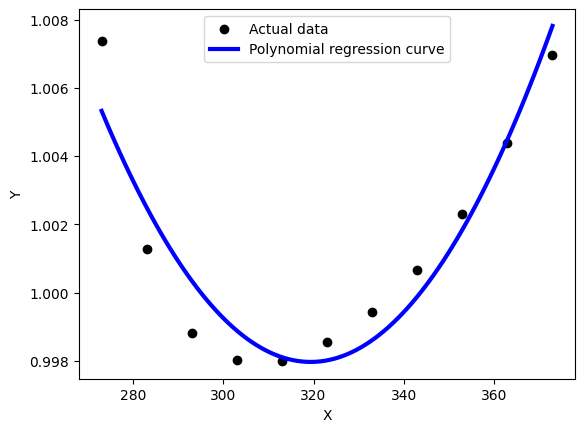

In [37]:
# Optionally, visualize the results
# Generate a range of values for X to plot the polynomial curve
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.scatter(X, y, color='black', label='Actual data')
plt.plot(X_range, y_range_pred, color='blue', linewidth=3, label='Polynomial regression curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()